In [6]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import sweetviz as sv
import dtale

import config

# 最大表示列数の指定（ここでは50列を指定）
pd.set_option("display.max_columns", 50)

In [9]:
df_mrna_agilent_microarray = pd.read_table(
    config.RAW_BRCA_METABRIC_DIR + "/data_mrna_agilent_microarray.txt", index_col=0
).T
df_mrna_agilent_microarray

Hugo_Symbol,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,AK055082,BU687559,LIN52,PCOTH,GRM1,FXN,SLC9A1,PML,CR749394,CD164,DB337918,MOBKL2A,...,TMEM146,SLIT3-AS1,PSMC3IP,TEAD1,LOC253724,BM725158,GRHPR,EGLN2,TBC1D4,ANGPTL2,AF086457,AK124197,ENOX1,SBF2-AS1,VN1R4,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,FAM71A
Entrez_Gene_Id,473.000000,494470.000000,NaN,NaN,51533.000000,1149.000000,167153.000000,NaN,10786.000000,10993.000000,245973.000000,2152.000000,196472.000000,NaN,NaN,91750.000000,542767.000000,2911.000000,2395.000000,6548.000000,5371.000000,NaN,8763.000000,NaN,126308.000000,...,257062.000000,728095.000000,29893.000000,7003.000000,NaN,NaN,9380.000000,112398.000000,9882.000000,23452.000000,NaN,NaN,55068.000000,283104.000000,317703.000000,NaN,NaN,56886.000000,6944.000000,114788.000000,54862.000000,NaN,57549.000000,NaN,149647.000000
MB-0362,8.676978,6.075331,5.453928,4.994525,5.838270,6.397503,7.906217,5.259461,5.702379,6.930741,5.332863,5.275676,5.443896,5.391825,5.332039,6.654909,6.116269,5.502459,6.170848,10.014262,6.223714,5.282517,5.453830,5.393823,6.781114,...,5.345515,5.289049,6.642358,5.384824,5.624982,5.244877,8.245886,11.179554,6.108972,9.144958,5.172836,5.623032,5.548618,5.335488,5.309543,5.271343,5.680321,7.688492,8.084979,5.161796,6.353215,4.836483,7.304643,5.251843,5.049591
MB-0346,9.653589,6.687887,5.454185,5.346010,5.600876,5.246319,8.267256,5.380069,5.521794,6.141689,7.563477,5.376381,5.319857,5.493960,4.974668,6.546139,5.496121,5.396100,6.462099,9.348527,5.771658,5.312611,5.856599,5.038963,6.932299,...,5.469792,5.614731,6.305837,5.835178,5.372428,5.174309,7.636559,9.593976,6.708027,7.387434,5.468569,5.482444,5.451468,5.471839,5.579198,5.942887,5.461069,7.804165,8.349115,5.197392,6.132355,5.316819,7.933324,5.450611,5.316790
MB-0386,9.033589,5.910885,5.501577,5.247467,6.030718,10.111816,7.959291,5.262024,5.689533,6.529312,5.482155,5.463788,5.254294,5.405767,5.306545,6.290807,6.202997,5.166248,5.881027,8.811785,6.532682,5.436369,5.381199,5.451264,6.671176,...,5.314732,5.173775,5.937808,5.676467,5.541437,5.261631,8.105658,11.108679,6.977441,9.030003,5.235995,5.641355,5.762705,5.322604,5.484665,5.174498,5.304030,7.934309,8.406332,8.087722,6.366335,5.466419,7.580336,5.235394,5.461617
MB-0574,8.814855,5.628740,5.471941,5.316523,5.849428,6.116868,9.206376,5.396576,5.439130,6.430102,5.398675,5.409761,5.512298,5.452995,5.409993,6.270448,5.882995,5.314793,6.059837,8.952057,6.113587,5.539569,5.897422,5.602036,6.708135,...,5.294164,5.420128,6.413538,5.457784,5.438267,5.126400,7.992744,10.642113,6.999086,7.219965,5.655266,5.966010,5.792747,5.520733,5.419803,5.116749,5.632249,7.744562,8.310019,5.780062,6.424048,5.193150,6.903654,5.091927,5.227130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-5465,8.131637,9.101942,5.423027,4.939292,5.644587,5.611189,7.798269,5.219962,5.597732,6.583524,5.514106,6.573131,5.367170,5.333079,5.067339,5.979393,5.631939,5.381806,6.164739,8.722484,6.661253,5.577581,6.489781,5.149507,6.508675,...,5.504469,5.172399,5.915299,5.507574,5.440004,5.423530,8.347530,10.303112,7.273884,10.428076,5.451566,5.830187,5.424103,5.285951,5.356291,5.417529,5.484696,7.643929,8.040024,5.456862,6.269748,5.337776,7.288315,5.359223,5.253696
MB-5453,9.606915,7.427494,5.534115,5.062191,5.927409,5.927031,8.520545,5.129501,5.550549,5.841476,5.832439,7.180979,5.437498,5.519022,5.228290,5.993193,5.609219,5.228326,6.265368,9.590919,6.998825,5.405440,6.651367,5.435571,7.120378,...,5.512817,5.328871,5.700866,5.498580,4.973839,5.353424,8.373276,10.490052,7.859871,9.073888,5.498199,5.824290,5.553243,5.199192,5.153886,5.566320,5.538543,7.048923,7.560101,5.397010,7.088676,5.216496,7.248336,5.544276,5.436415
MB-5471,9.049296,6.850000,5.339346,5.166765,6.117095,6.374305,8.499637,4.961279,5.497546,6.351428,5.5

# 特徴量が重複していないか確認
遺伝子名が数多く存在するので、特徴量の名前に重複がないか確認する。

In [3]:
import collections

[
    k
    for k, v in collections.Counter(df_mrna_agilent_microarray.columns.tolist()).items()
    if v > 1
]

['HERC2P9',
 'RPL7A',
 'RBMY1F',
 'MUC3A',
 'TP53TG3D',
 'RDH5',
 'TRDV2',
 'NIPAL1',
 'PCDHA@',
 'SMG1P5',
 'RIOK3',
 'SRR',
 'BOLA2',
 'CEP170',
 'SPAG8',
 'GNG10',
 'PPM1H',
 'NSUN5',
 'IGLL1',
 'CBWD1',
 'FCGR1A',
 'MAGED4B',
 'LINC00965',
 'RPL36',
 'ILKAP',
 'CD24',
 'HLA-DRB4',
 'SLC25A37',
 'DYNLRB1',
 'LINC00937',
 'BMS1P21',
 'PLAGL1',
 'RPAIN',
 'LSP1',
 'MRPL23',
 'LINC01089',
 'DMRTC1B',
 'LINC00869',
 'RPL13A',
 'RPL5',
 'OTUD7A',
 'SBDS',
 'INTS4',
 'SRGAP2',
 'MS4A18',
 'PIN4',
 'XG',
 'PCSK6',
 'CORT',
 'CEP164',
 'RPL37',
 'AFAP1',
 'FAM163B',
 'CLK2',
 'BMS1',
 'SNRPN',
 'BIRC5',
 'IGSF9B',
 'RPL4',
 'CTTNBP2NL',
 'WASH3P',
 'LINC01128',
 'BMS1P4',
 'PMS2P1',
 'MZT2A',
 'RFFL',
 'P2RX5',
 'FAM153A',
 'CYP2D6',
 'SLX1A',
 'NBPF1',
 'AIDA',
 'OR1D5',
 'MRPL45P2',
 'CSPG4P5',
 'FAM230A',
 'ELMOD1',
 'PPT2',
 'DDX17',
 'NME1',
 'RPL39',
 'RPL13',
 'LIMS3',
 'CES5A',
 'TSPY1',
 'NNT',
 'DND1',
 'GOLGA6L5P',
 'MT1E',
 'STAG3',
 'DEPDC4',
 'YWHAE',
 'TNRC18',
 'UBE2V1',
 'O

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


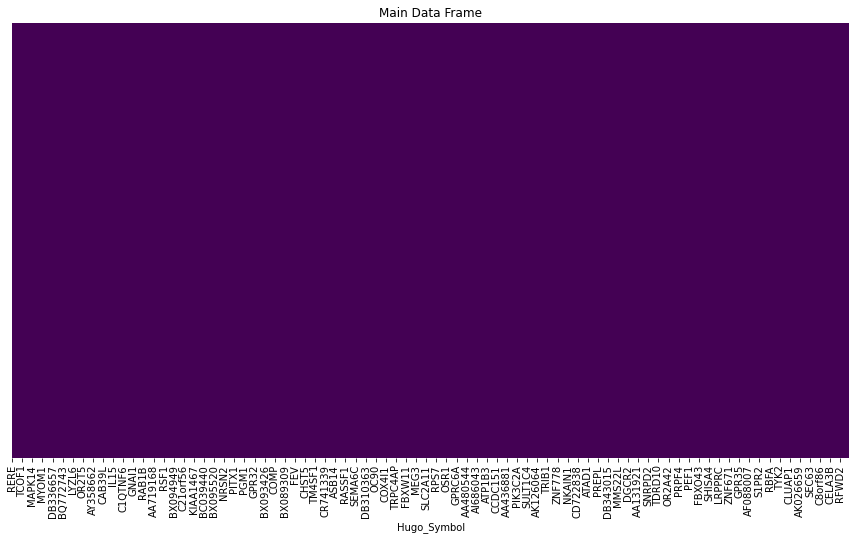

In [7]:
# Visualization of missing data
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(
    df_mrna_agilent_microarray.isnull(),
    yticklabels=False,
    cbar=False,
    cmap="viridis",
)
ax.set_title("Main Data Frame")
plt.show();